# Data Science and Machine Learning Assignment

## Task 1

This notebook showcases the analysis of supermarket transaction data collected over a two-year period. The goal is to:
1. **Clean and prepare the data** for analysis.
2. Perform **exploratory data analysis (EDA)** to uncover insights.
3. Implement at least **two business-valued solutions** using data analytics and machine learning.
4. Build an **apriori algoritm** to identify products bought together frequently and use it to identify if there are any promotions for the frequently bought product.
5. Implement a **predictive model** to forecast sales.


# Data Cleansing and Transformation

#### Import the required libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import re

print("Completed importing libraries")

Completed importing libraries


### Loading the datasets

In [2]:
items_df = pd.read_csv('item.csv')
supermarkets_df = pd.read_csv('supermarkets.csv')
promotions_df = pd.read_csv('promotion.csv')
sales_df = pd.read_csv('sales.csv')

#### Display the datasets to check if the records have been loaded and the csv file content

In [3]:
# displaying the first 5 items in items dataframe
display(items_df.head())

,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,Type 1,Aunt Jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,Type 1,Bisquick,6.75 OZ


In [4]:
# displaying the first 5 items in supermarkets dataframe
display(supermarkets_df.head())

,supermarket_No,postal-code
0,199,30319
1,200,30134
2,201,30066
3,202,31093
4,203,30542


In [5]:
# displaying the first 5 items in promotions dataframe
display(promotions_df.head())

,code,supermarkets,week,feature,display,province
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap,2
1,2700042292,285,92,Interior Page Feature,Not on Display,2
2,2700042274,285,92,Interior Page Feature,Not on Display,2
3,2700042273,285,92,Interior Page Feature,Not on Display,2
4,2700042254,285,92,Interior Page Feature,Not on Display,2


In [6]:
# displaying the first 5 items in sales dataframe
display(sales_df.head())

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


#### Getting the dataframes shape (dimensions)

In [7]:
print("Items: ", items_df.shape)
print("Supermarkets: ", supermarkets_df.shape)
print("Promotion: ", promotions_df.shape)
print("Sales: ", sales_df.shape)

Items:  (927, 5)
Supermarkets:  (387, 2)
Promotion:  (351372, 6)
Sales:  (1048575, 11)


### Data cleansing

#### Rename the postal-code column in supermarkets_df

In [8]:
# Rename the column 'postal-code' to 'postal_code'
supermarkets_df.rename(columns={'postal-code': 'postal_code'}, inplace=True)

In [9]:
supermarkets_df.head()

,supermarket_No,postal_code
0,199,30319
1,200,30134
2,201,30066
3,202,31093
4,203,30542


#### Rename the descrption column in items_df

In [10]:
# Rename the column 'descrption' to 'description'
items_df.rename(columns={'descrption': 'description'}, inplace=True)

In [11]:
items_df.head()

,code,description,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,Type 1,Aunt Jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,Type 1,Bisquick,6.75 OZ


#### Checking for missing values

In [12]:
# Check for missing values in items dataset
print(items_df.isnull().sum(),"\n")

print("Empty strings in dataset:\n", (items_df == " ").sum())

code           0
description    0
type           0
brand          0
size           0
dtype: int64 

Empty strings in dataset:
 code           0
description    0
type           0
brand          0
size           3
dtype: int64


In [13]:
# Check for missing values in supermarkets dataset
print(supermarkets_df.isnull().sum(),"\n")

print("\nEmpty strings in dataset:\n", (supermarkets_df == " ").sum())

supermarket_No    0
postal_code       0
dtype: int64 


Empty strings in dataset:
 supermarket_No    0
postal_code       0
dtype: int64


In [14]:
# Check for missing values in promotions dataset
print(promotions_df.isnull().sum(),"\n")

print("\nEmpty strings in dataset:\n", (promotions_df == " ").sum())

code            0
supermarkets    0
week            0
feature         0
display         0
province        0
dtype: int64 


Empty strings in dataset:
 code            0
supermarkets    0
week            0
feature         0
display         0
province        0
dtype: int64


In [15]:
# Check for missing values in sales dataset
print(sales_df.isnull().sum(),"\n")

print("\nEmpty strings in dataset:\n", (sales_df == " ").sum())

code           0
amount         0
units          0
time           0
province       0
week           0
customerId     0
supermarket    0
basket         0
day            0
voucher        0
dtype: int64 


Empty strings in dataset:
 code           0
amount         0
units          0
time           0
province       0
week           0
customerId     0
supermarket    0
basket         0
day            0
voucher        0
dtype: int64


In [16]:
# Checking unique values in the 'size' column of items dataset
print(items_df['size'].unique())

['2 LB' '32    OZ' '32 OZ' '1 LB' '6.75 OZ' '7 OZ' '7.75 OZ' '1.5 LB'
 '16 OZ' '5 OZ' '10.5 OZ' ' ' '37 OZ' '28 OZ' '12.00Z' '5.5 OZ' '24 OUNCE'
 '24    OZ' '24 OZ' '2.5 OZ' '6 1/2 OZ' '12 OZ' '8.5 OZ' '8 OZ' 'KH# 2793'
 '16    OZ' '16 OUNCE' '9    OZ' '12 OUNCE' 'CUST REQST' '8    OZ' '16OZ'
 '15 OZ' '14 OZ' '13 OZ' '13OZ FMLY' '6.5 OZ' '12.7 OZ' '17.6 OZ' '10 OZ'
 'N     1 LB' '16  OZ' '16  Z' '17.5 OZ' 'KH# 6862' 'P    16 OZ'
 'P    12 OZ' '7    OZ' 'P     1 LB' 'KH# 8652' 'KH# 8651' 'KH# 8623'
 'KH# 13384' 'KH# 8525' 'KH# 8627' '17 OZ' '%KH# 9390' 'KH# 18280'
 'KH# 18283' 'KH# 18277' '13.25 OZ' 'NO TAG' '16.00  OZ' 'N    16 OZ'
 'KH# 20749' '7.25 OZ' '##########' '8 OUNCE' '3LB' '17.7 OZ' '6 OZ'
 '10OZ' 'N     7 OZ' '32OZ' '48 OZ' '8.8 OZ' '4 LB' 'KH# 39724'
 'SO   16 OZ' 'CR   16 OZ' '3.5 OZ' '2.8 OZ' '31.5 OZ' '31 1/2 OZ'
 '26    OZ' '26 OUNCE' '26 OZ' 'KH# 71916' '23OZ' '6.3 OZ' '10    OZ'
 '26.5 OZ' '25 OZ' 'P    25 OZ' '15.5 OZ' '25.5 OZ' '%KH# 29483' '.50 OZ'
 '1.1 OZ' 'CR   

In [17]:
# dropping items with no size
items_df = items_df.drop(items_df[items_df['size'] == ' '].index)

items_df = items_df.dropna()

In [18]:
# Define the unwanted patterns in the 'size' column
unwanted_patterns = ['KH#', '##########' ,'%KH#' , 'NO TAG']

remove_patterns = ['FMLY' ,'PET' ,'CUST REQST']

# Remove rows where 'size' starts with 'KH#' or '##########'
items_df = items_df[~items_df['size'].str.startswith(tuple(unwanted_patterns), na=False)]

# Remove rows where the 'size' column contains any of the patterns in remove_patterns
items_df = items_df[~items_df['size'].str.contains('|'.join(remove_patterns), na=False)]

# Replace "OUNCE" with "OZ" in the 'size' column
items_df['size'] = items_df['size'].str.replace('OUNCE', 'OZ')

In [19]:
# Checking unique values in the 'size' column of items dataset
print(items_df['size'].unique())

['2 LB' '32    OZ' '32 OZ' '1 LB' '6.75 OZ' '7 OZ' '7.75 OZ' '1.5 LB'
 '16 OZ' '5 OZ' '10.5 OZ' '37 OZ' '28 OZ' '12.00Z' '5.5 OZ' '24 OZ'
 '24    OZ' '2.5 OZ' '6 1/2 OZ' '12 OZ' '8.5 OZ' '8 OZ' '16    OZ'
 '9    OZ' '8    OZ' '16OZ' '15 OZ' '14 OZ' '13 OZ' '6.5 OZ' '12.7 OZ'
 '17.6 OZ' '10 OZ' 'N     1 LB' '16  OZ' '16  Z' '17.5 OZ' 'P    16 OZ'
 'P    12 OZ' '7    OZ' 'P     1 LB' '17 OZ' '13.25 OZ' '16.00  OZ'
 'N    16 OZ' '7.25 OZ' '3LB' '17.7 OZ' '6 OZ' '10OZ' 'N     7 OZ' '32OZ'
 '48 OZ' '8.8 OZ' '4 LB' 'SO   16 OZ' 'CR   16 OZ' '3.5 OZ' '2.8 OZ'
 '31.5 OZ' '31 1/2 OZ' '26    OZ' '26 OZ' '23OZ' '6.3 OZ' '10    OZ'
 '26.5 OZ' '25 OZ' 'P    25 OZ' '15.5 OZ' '25.5 OZ' '.50 OZ' '1.1 OZ'
 'CR   14 OZ' '11.6' '27.75 OZ' '67  OZ' '67 OZ' '48    OZ' '28    OZ'
 '25.75 OZ' '25.6 OZ' '27.50 OZ' '27.5 OZ' '3 LB' '26.50 OZ' '26 OZ.'
 '26.3 OZ' '6 LB 11 OZ' '45 OZ' '45    OZ' '45 OZ.' '25.3 OZ' '12.5 FL OZ'
 '24  OZ' '36 OZ' '36    OZ' '12 FL OZ' '12.5 OZ' '27.6 OZ' 'GAL' '23 OZ'
 'P    24 OZ

In [20]:
# Function to clean the data for leading characters
def remove_leading_char(value):
    # Use regex to remove any leading non-numeric characters
    cleaned_value = re.sub(r'^[^\d.]*', '', value)
    return cleaned_value


# Function to clean the data for non numeric strings
def remove_non_numeric(value):
    # Check if the value contains at least one numeric character
    if re.search(r'\d', value):
        return value  # Return the original value as it contains numerics
    else:
        return None  # Return None if no numerics are found

In [21]:
# Apply the cleaning functions to the 'size' column
items_df['size'] = items_df['size'].apply(remove_leading_char)

items_df['size'] = items_df['size'].apply(remove_non_numeric)

In [22]:
print("Items: ", items_df.shape)

Items:  (892, 5)


In [23]:
# Checking unique values in the 'size' column of items dataset
print(items_df['size'].unique())

['2 LB' '32    OZ' '32 OZ' '1 LB' '6.75 OZ' '7 OZ' '7.75 OZ' '1.5 LB'
 '16 OZ' '5 OZ' '10.5 OZ' '37 OZ' '28 OZ' '12.00Z' '5.5 OZ' '24 OZ'
 '24    OZ' '2.5 OZ' '6 1/2 OZ' '12 OZ' '8.5 OZ' '8 OZ' '16    OZ'
 '9    OZ' '8    OZ' '16OZ' '15 OZ' '14 OZ' '13 OZ' '6.5 OZ' '12.7 OZ'
 '17.6 OZ' '10 OZ' '16  OZ' '16  Z' '17.5 OZ' '7    OZ' '17 OZ' '13.25 OZ'
 '16.00  OZ' '7.25 OZ' '3LB' '17.7 OZ' '6 OZ' '10OZ' '32OZ' '48 OZ'
 '8.8 OZ' '4 LB' '3.5 OZ' '2.8 OZ' '31.5 OZ' '31 1/2 OZ' '26    OZ'
 '26 OZ' '23OZ' '6.3 OZ' '10    OZ' '26.5 OZ' '25 OZ' '15.5 OZ' '25.5 OZ'
 '.50 OZ' '1.1 OZ' '11.6' '27.75 OZ' '67  OZ' '67 OZ' '48    OZ'
 '28    OZ' '25.75 OZ' '25.6 OZ' '27.50 OZ' '27.5 OZ' '3 LB' '26.50 OZ'
 '26 OZ.' '26.3 OZ' '6 LB 11 OZ' '45 OZ' '45    OZ' '45 OZ.' '25.3 OZ'
 '12.5 FL OZ' '24  OZ' '36 OZ' '36    OZ' '12 FL OZ' '12.5 OZ' '27.6 OZ'
 None '23 OZ' '12    OZ' '24 FL OZ' '24OZ' '10.6 OZ' '16.9 OZ' '19 OZ'
 '36 FL OZ' '40 OZ' '36 OZ.' '20 OZ' '14.5 OZ']


In [24]:
# locates the matching row
matching_row = items_df.loc[items_df['size'] == '6 LB 11 OZ']
print(matching_row)

           code                description    type brand        size
745  3620000661  RAGU TRAD SPAGH SCE PLAIN  Type 3  Ragu  6 LB 11 OZ


In [25]:
# Remove the row where 'size' exactly matches "6 LB 11 OZ"
items_df = items_df[items_df['size'] != '6 LB 11 OZ']

In [26]:
# Checking unique values in the 'size' column of items dataset
print(items_df['size'].unique())

['2 LB' '32    OZ' '32 OZ' '1 LB' '6.75 OZ' '7 OZ' '7.75 OZ' '1.5 LB'
 '16 OZ' '5 OZ' '10.5 OZ' '37 OZ' '28 OZ' '12.00Z' '5.5 OZ' '24 OZ'
 '24    OZ' '2.5 OZ' '6 1/2 OZ' '12 OZ' '8.5 OZ' '8 OZ' '16    OZ'
 '9    OZ' '8    OZ' '16OZ' '15 OZ' '14 OZ' '13 OZ' '6.5 OZ' '12.7 OZ'
 '17.6 OZ' '10 OZ' '16  OZ' '16  Z' '17.5 OZ' '7    OZ' '17 OZ' '13.25 OZ'
 '16.00  OZ' '7.25 OZ' '3LB' '17.7 OZ' '6 OZ' '10OZ' '32OZ' '48 OZ'
 '8.8 OZ' '4 LB' '3.5 OZ' '2.8 OZ' '31.5 OZ' '31 1/2 OZ' '26    OZ'
 '26 OZ' '23OZ' '6.3 OZ' '10    OZ' '26.5 OZ' '25 OZ' '15.5 OZ' '25.5 OZ'
 '.50 OZ' '1.1 OZ' '11.6' '27.75 OZ' '67  OZ' '67 OZ' '48    OZ'
 '28    OZ' '25.75 OZ' '25.6 OZ' '27.50 OZ' '27.5 OZ' '3 LB' '26.50 OZ'
 '26 OZ.' '26.3 OZ' '45 OZ' '45    OZ' '45 OZ.' '25.3 OZ' '12.5 FL OZ'
 '24  OZ' '36 OZ' '36    OZ' '12 FL OZ' '12.5 OZ' '27.6 OZ' None '23 OZ'
 '12    OZ' '24 FL OZ' '24OZ' '10.6 OZ' '16.9 OZ' '19 OZ' '36 FL OZ'
 '40 OZ' '36 OZ.' '20 OZ' '14.5 OZ']


In [27]:
# Split 'size' column into 'quantity' and 'metrics' columns
# Note: we use expand=True to create two new columns
items_df[['quantity', 'metrics']] = items_df['size'].str.split(expand=True, n=1)

In [28]:
items_df.head()

,code,description,type,brand,size,quantity,metrics
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB,2,LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ,32,OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ,32,OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,Type 1,Aunt Jemima,1 LB,1,LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,Type 1,Bisquick,6.75 OZ,6.75,OZ


In [29]:
# Check for missing values in items dataset
print(items_df.isnull().sum(),"\n")

code            0
description     0
type            0
brand           0
size            1
quantity        1
metrics        19
dtype: int64 



In [30]:
# removing null values
items_df = items_df.dropna(subset=['size'])

In [31]:
print(items_df[items_df['metrics'].isnull()])

           code                      description    type          brand  \
29   4163100055           LUND SWEDE PANCAKE MIX  Type 1     Lund Swede   
97   7680852009          BARILLA FIORI SHORT CUT  Type 2        Barilla   
149  1510000163         CREAMETTE SPAGHETTI THIN  Type 2      Creamette   
299  2920000421              MUELLER ELBO MACARO  Type 2        Mueller   
322  4017367004      Type 2 SHP XMAS TREE Type 2  Type 2  Type 2 Shoppe   
323  4017367005       Type 2 SHOPPE SANTA Type 2  Type 2  Type 2 Shoppe   
324  4017367008       Type 2 SHOP HALLOWEEN PSTA  Type 2  Type 2 Shoppe   
327  4017367015       PSTA SHP FALL HRVST Type 2  Type 2  Type 2 Shoppe   
328  4017367016         P S GNGRBREAD MAN Type 2  Type 2  Type 2 Shoppe   
329  4017367017               P S SNOWMAN Type 2  Type 2  Type 2 Shoppe   
331  4017367029      Type 2 SHOP TAILGATE Type 2  Type 2  Type 2 Shoppe   
332  4017367041        PSTA SHP APPL ORCHRD PSTA  Type 2  Type 2 Shoppe   
339  9999985005  PRIVATE 

In [32]:
# Function to separate quantity and metrics
def separate_quantity_metrics(size):
    # Use regex to extract quantity and metrics
    quantity_match = re.search(r'(\d+\.?\d*)', size)  # Matches integer or decimal numbers
    metrics_match = re.search(r'\b(OZ|LB)\b', size)   # Matches 'OZ' or 'LB'

    # Check if matches were found
    if quantity_match and metrics_match:
        return pd.Series([quantity_match.group(1), metrics_match.group(0)])  # Return quantity and metrics
    else:
        return pd.Series([np.nan, np.nan])  # Return NaN for invalid entries

# Apply the function to the 'size' column
items_df[['quantity', 'metrics']] = items_df['size'].apply(separate_quantity_metrics)

# Drop rows where 'quantity' or 'metrics' is NaN
items_df = items_df.dropna(subset=['quantity', 'metrics'])


In [33]:
# prints if the metrics is null
print(items_df[items_df['metrics'].isnull()])

Empty DataFrame
Columns: [code, description, type, brand, size, quantity, metrics]
Index: []


In [34]:
items_df.shape

(871, 7)

#### Converting the time column from integer to a time format

In [35]:
sales_df.head()

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [36]:
# Checking unique values in the 'time' column of the sales dataset
print(sales_df['time'].unique())

[1100 1137 1148 ...  531  328  438]


In [37]:
# Fix time format in the sales data
def fix_time_format(time_col):
    # Convert integer format (HHMM) into a string, fill zeros for times like 900 -> 09:00
    time_col = time_col.apply(lambda x: f"{int(x)//100:02}:{int(x)%100:02}")
    return time_col

In [38]:
# Apply the function to the 'time' column
sales_df['time'] = fix_time_format(sales_df['time'])

# Verify the changes
print(sales_df[['time']].head())

    time
0  11:00
1  11:00
2  11:37
3  11:48
4  13:23


#### Getting the datatypes

In [39]:
print("Items\n\n",items_df.dtypes,"\n")
print("Supermarkets\n\n",supermarkets_df.dtypes,"\n")
print("Promotion\n\n",promotions_df.dtypes,"\n")
print("Sales\n\n",sales_df.dtypes,"\n")

Items

 code            int64
description    object
type           object
brand          object
size           object
quantity       object
metrics        object
dtype: object 

Supermarkets

 supermarket_No    int64
postal_code       int64
dtype: object 

Promotion

 code             int64
supermarkets     int64
week             int64
feature         object
display         object
province         int64
dtype: object 

Sales

 code             int64
amount         float64
units            int64
time            object
province         int64
week             int64
customerId       int64
supermarket      int64
basket           int64
day              int64
voucher          int64
dtype: object 



In [40]:
# Change the 'time' column to datetime
sales_df['time'] = pd.to_datetime(sales_df['time'])

In [41]:
# Change 'quantity' column to int
items_df['quantity'] = items_df['quantity'].astype(float)

In [42]:
print("Items\n\n",items_df.dtypes,"\n")
print("Sales\n\n",sales_df.dtypes,"\n")

Items

 code             int64
description     object
type            object
brand           object
size            object
quantity       float64
metrics         object
dtype: object 

Sales

 code                    int64
amount                float64
units                   int64
time           datetime64[ns]
province                int64
week                    int64
customerId              int64
supermarket             int64
basket                  int64
day                     int64
voucher                 int64
dtype: object 



#### Remove not required columns

In [43]:
promotions_df.drop(columns=['province'], inplace=True)
promotions_df.head()

,code,supermarkets,week,feature,display
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap
1,2700042292,285,92,Interior Page Feature,Not on Display
2,2700042274,285,92,Interior Page Feature,Not on Display
3,2700042273,285,92,Interior Page Feature,Not on Display
4,2700042254,285,92,Interior Page Feature,Not on Display


In [44]:
sales_df.drop(columns=['time' , 'province' , 'day' , 'voucher' , 'customerId'], inplace=True)
sales_df.head()

,code,amount,units,week,supermarket,basket
0,7680850106,0.80,1,1,244,1
1,3620000470,3.59,1,1,244,1
2,1800028064,2.25,1,1,244,2
3,9999985067,0.85,1,1,244,3
4,9999985131,2.19,1,1,244,4


In [45]:
items_df.drop(columns=['type' , 'brand' , 'size' , 'quantity' , 'metrics'], inplace=True)
items_df.head()

,code,description
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX
1,3000005070,A/JEM COMPLETE PANCAKE MI
2,3000005300,AJ BUTTERMILK PANCAKE MIX
3,3000005350,A J BTRMLK COMP PNCK MIX
4,1600015760,BC PANCAKE MIX BUTTERMILK


#### Calculating total sales value for each item (assumption made that amount is per unit)

In [46]:
sales_df['totAmnt'] = sales_df['units'] * sales_df['amount']
sales_df.head()

,code,amount,units,week,supermarket,basket,totAmnt
0,7680850106,0.80,1,1,244,1,0.80
1,3620000470,3.59,1,1,244,1,3.59
2,1800028064,2.25,1,1,244,2,2.25
3,9999985067,0.85,1,1,244,3,0.85
4,9999985131,2.19,1,1,244,4,2.19


#### Removing duplicate rows

In [47]:
items_df = items_df.drop_duplicates()
items_df.head()

,code,description
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX
1,3000005070,A/JEM COMPLETE PANCAKE MI
2,3000005300,AJ BUTTERMILK PANCAKE MIX
3,3000005350,A J BTRMLK COMP PNCK MIX
4,1600015760,BC PANCAKE MIX BUTTERMILK


In [48]:
supermarkets_df = supermarkets_df.drop_duplicates()
supermarkets_df.head()

,supermarket_No,postal_code
0,199,30319
1,200,30134
2,201,30066
3,202,31093
4,203,30542


In [49]:
sales_df.drop_duplicates(inplace=True)
sales_df.head()

,code,amount,units,week,supermarket,basket,totAmnt
0,7680850106,0.80,1,1,244,1,0.80
1,3620000470,3.59,1,1,244,1,3.59
2,1800028064,2.25,1,1,244,2,2.25
3,9999985067,0.85,1,1,244,3,0.85
4,9999985131,2.19,1,1,244,4,2.19


In [50]:
promotions_df.drop_duplicates(inplace=True)
promotions_df.head()

,code,supermarkets,week,feature,display
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap
1,2700042292,285,92,Interior Page Feature,Not on Display
2,2700042274,285,92,Interior Page Feature,Not on Display
3,2700042273,285,92,Interior Page Feature,Not on Display
4,2700042254,285,92,Interior Page Feature,Not on Display


# Training ML models to achieve business insights

### Apriori Algorithm - to identify items bought together frequently

#### Install required libraries

In [51]:
#pip install mlxtend

#### Import the required libraries

In [52]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


#### Data preparation

In [53]:
# Ensure uniqueness in promotions_df
promotions_unique = promotions_df[['code', 'supermarkets', 'display', 'feature']].drop_duplicates()


In [54]:
# Merge sales_df with items_df to get product descriptions
sales_with_items = pd.merge(sales_df, items_df[['code', 'description']], on='code', how='left')


In [55]:
# Create the basket (pivot table) for the Apriori algorithm
basket_df = sales_with_items.groupby(['supermarket', 'basket', 'description'])['units'].sum().unstack().fillna(0)

# Convert the matrix to a binary format (1 for purchased, 0 for not purchased)
basket_df = basket_df.applymap(lambda x: 1 if x > 0 else 0)


In [56]:
basket_df.head()

description         (S)BARILLA GEMELLI Type 2  (S)BARILLA RIGATONI Type 2  \
supermarket basket                                                          
1           223050                          0                           0   
            223051                          0                           0   
            223052                          0                           0   
            223053                          0                           0   
            223054                          0                           0   

description         (S)PREGO RICOTTA PARMESAN  (S)RAGU CHNKY GRDNSTYL GR  \
supermarket basket                                                         
1           223050                          0                          0   
            223051                          0                          0   
            223052                          0                          0   
            223053                          0                          0   
            223054                          0                          0   

description         *HODGE WHEAT LASAGNA  *HODGE WHEAT SPAGHETTI  \
supermarket basket                                                 
1           223050                     0                       0   
            223051                     0                       0   
            223052                     0                       0   
            223053                     0                       0   
            223054                     0                       0   

description         A J BTRMLK COMP PNCK MIX  A J BUTTER RICH SYRUP  \
supermarket basket                                                    
1           223050                         0                      0   
            223051                         0                      0   
            223052                         0                      0   
            223053                         0                      0   
            223054                         0                      0   

description         A J COUNTRY RICH LT SYRUP  A/JEM COMPLETE PANCAKE MI  ...  \
supermarket basket                                                        ...   
1           223050                          0                          0  ...   
            223051                          0                          0  ...   
            223052                          0                          0  ...   
            223053                          0                          0  ...   
            223054                          0                          0  ...   

description         SPRTR SUGAR FREE SYRUP  SUGAR BUSTER SPAGHETTI  \
supermarket basket                                                   
1           223050                       0                       0   
            223051                       0                       0   
            223052                       0                       0   
            223053                       0                       0   
            223054                       0                       0   

description         SUGAR BUSTER SPIRALS  Type 2RISO BRN RICE SPAG  \
supermarket basket                                                   
1           223050                     0                         0   
            223051                     0                         0   
            223052                     0                         0   
            223053                     0                         0   
            223054                     0                         0   

description         VERMONT 100% PURE MAPLE SYRUP  VINCENT S ORIG MARINARA S  \
supermarket basket                                                             
1           223050                              0                          0   
            223051                              0                          0   
            223052                              0                          0   
  

In [57]:
# List to store association rules from all supermarkets
all_rules = []

# Get the unique supermarket IDs
supermarket_ids = basket_df.index.get_level_values('supermarket').unique()


In [58]:
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Rule generation
for supermarket_id in supermarket_ids:
    print(f"\nGenerating rules for Supermarket {supermarket_id}...")

    # Subset the basket for each supermarket
    supermarket_basket = basket_df.xs(supermarket_id, level='supermarket')

    # Apply Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(supermarket_basket, min_support=0.01, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

    # If no rules are found, skip this supermarket
    if rules.empty:
        print(f"No rules found for Supermarket {supermarket_id}.")
        continue

    # Convert frozensets to readable product descriptions
    rules['Product Bought'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules['Frequently Bought Together'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

    # Add supermarket information to the results
    rules['Supermarket'] = supermarket_id

    # Append to the all_rules list
    all_rules.append(rules)


Generating rules for Supermarket 1...
No rules found for Supermarket 1.

Generating rules for Supermarket 2...
No rules found for Supermarket 2.

Generating rules for Supermarket 3...
No rules found for Supermarket 3.

Generating rules for Supermarket 4...
No rules found for Supermarket 4.

Generating rules for Supermarket 5...
No rules found for Supermarket 5.

Generating rules for Supermarket 6...
No rules found for Supermarket 6.

Generating rules for Supermarket 7...
No rules found for Supermarket 7.

Generating rules for Supermarket 8...
No rules found for Supermarket 8.

Generating rules for Supermarket 9...
No rules found for Supermarket 9.

Generating rules for Supermarket 10...
No rules found for Supermarket 10.

Generating rules for Supermarket 11...
No rules found for Supermarket 11.

Generating rules for Supermarket 12...
No rules found for Supermarket 12.

Generating rules for Supermarket 13...

Generating rules for Supermarket 14...
No rules found for Supermarket 14.

Ge

No rules found for Supermarket 121.

Generating rules for Supermarket 122...
No rules found for Supermarket 122.

Generating rules for Supermarket 123...
No rules found for Supermarket 123.

Generating rules for Supermarket 124...
No rules found for Supermarket 124.

Generating rules for Supermarket 125...
No rules found for Supermarket 125.

Generating rules for Supermarket 126...
No rules found for Supermarket 126.

Generating rules for Supermarket 127...
No rules found for Supermarket 127.

Generating rules for Supermarket 128...
No rules found for Supermarket 128.

Generating rules for Supermarket 129...
No rules found for Supermarket 129.

Generating rules for Supermarket 130...
No rules found for Supermarket 130.

Generating rules for Supermarket 131...
No rules found for Supermarket 131.

Generating rules for Supermarket 132...
No rules found for Supermarket 132.

Generating rules for Supermarket 133...
No rules found for Supermarket 133.

Generating rules for Supermarket 134...

No rules found for Supermarket 235.

Generating rules for Supermarket 236...
No rules found for Supermarket 236.

Generating rules for Supermarket 237...
No rules found for Supermarket 237.

Generating rules for Supermarket 238...
No rules found for Supermarket 238.

Generating rules for Supermarket 239...
No rules found for Supermarket 239.

Generating rules for Supermarket 240...
No rules found for Supermarket 240.

Generating rules for Supermarket 241...
No rules found for Supermarket 241.

Generating rules for Supermarket 242...
No rules found for Supermarket 242.

Generating rules for Supermarket 243...
No rules found for Supermarket 243.

Generating rules for Supermarket 244...
No rules found for Supermarket 244.

Generating rules for Supermarket 245...
No rules found for Supermarket 245.

Generating rules for Supermarket 246...
No rules found for Supermarket 246.

Generating rules for Supermarket 247...
No rules found for Supermarket 247.

Generating rules for Supermarket 248...

No rules found for Supermarket 347.

Generating rules for Supermarket 348...
No rules found for Supermarket 348.

Generating rules for Supermarket 349...
No rules found for Supermarket 349.

Generating rules for Supermarket 350...
No rules found for Supermarket 350.

Generating rules for Supermarket 351...
No rules found for Supermarket 351.

Generating rules for Supermarket 352...
No rules found for Supermarket 352.

Generating rules for Supermarket 353...
No rules found for Supermarket 353.

Generating rules for Supermarket 354...
No rules found for Supermarket 354.

Generating rules for Supermarket 355...
No rules found for Supermarket 355.

Generating rules for Supermarket 356...
No rules found for Supermarket 356.

Generating rules for Supermarket 357...
No rules found for Supermarket 357.

Generating rules for Supermarket 358...
No rules found for Supermarket 358.

Generating rules for Supermarket 359...
No rules found for Supermarket 359.

Generating rules for Supermarket 360...

Antecedents: These are the products that, when purchased, lead to the purchase of other products.
Consequents: These are the products that are likely to be bought when the antecedent product(s) are purchased.

In [59]:
# Concatenate all rules into one DataFrame
all_rules_df = pd.concat(all_rules)

# Display the first few rules
print(all_rules_df.head())

                           antecedents                        consequents  \
0  (PRIVATE LABEL SPAGHTTI SAUCE MEAT)  (PRIVATE LABEL SPAGHETTI REGULAR)   
0           (RONZONI\OVEN RDY LASAGNE)        (PREGO THREE CHEESE Type 2)   
1          (PREGO THREE CHEESE Type 2)         (RONZONI\OVEN RDY LASAGNE)   
0          (HUNTS SPAG.SAUCE MUSHROOM)        (HUNTS SPAG SCE GARLIC/HER)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.024845            0.080745  0.012422    0.500000   6.192308   
0            0.013937            0.019164  0.010453    0.750000  39.136364   
1            0.019164            0.013937  0.010453    0.545455  39.136364   
0            0.020060            0.035105  0.012036    0.600000  17.091429   

   leverage  conviction  zhangs_metric                     Product Bought  \
0  0.010416    1.838509       0.859873  PRIVATE LABEL SPAGHTTI SAUCE MEAT   
0  0.010186    3.923345       0.988221           RONZONI\OVEN RDY LAS

In [60]:
# Merge with promotions_df to check if the items are on promotion
all_rules_df['On Promotion'] = all_rules_df['Frequently Bought Together'].apply(
    lambda product: 'Yes' if any(promotions_df['code'].isin(items_df[items_df['description'] == product]['code'])) else 'No'
)


In [61]:
# Merge with items_df to get product codes for the descriptions
all_rules_df = pd.merge(
    all_rules_df,
    items_df[['code', 'description']],
    left_on='Product Bought',
    right_on='description',
    how='left'
)

In [62]:
# Rename the new code column for clarity
all_rules_df.rename(columns={'code': 'Product Bought Code'}, inplace=True)

In [63]:
all_rules_df.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Product Bought,Frequently Bought Together,Supermarket,On Promotion,Product Bought Code,description
0,(PRIVATE LABEL SPAGHTTI SAUCE MEAT),(PRIVATE LABEL SPAGHETTI REGULAR),0.024845,0.080745,0.012422,0.500000,6.192308,0.010416,1.838509,0.859873,PRIVATE LABEL SPAGHTTI SAUCE MEAT,PRIVATE LABEL SPAGHETTI REGULAR,13,Yes,9999966720,PRIVATE LABEL SPAGHTTI SAUCE MEAT
1,(RONZONI\OVEN RDY LASAGNE),(PREGO THREE CHEESE Type 2),0.013937,0.019164,0.010453,0.750000,39.136364,0.010186,3.923345,0.988221,RONZONI\OVEN RDY LASAGNE,PREGO THREE CHEESE Type 2,105,Yes,7130000081,RONZONI\OVEN RDY LASAGNE
2,(PREGO THREE CHEESE Type 2),(RONZONI\OVEN RDY LASAGNE),0.019164,0.013937,0.010453,0.545455,39.136364,0.010186,2.169338,0.993487,PREGO THREE CHEESE Type 2,RONZONI\OVEN RDY LASAGNE,105,Yes,5100005043,PREGO THREE CHEESE Type 2
3,(HUNTS SPAG.SAUCE MUSHROOM),(HUNTS SPAG SCE GARLIC/HER),0.020060,0.035105,0.012036,0.600000,17.091429,0.011332,2.412237,0.960764,HUNTS SPAG.SAUCE MUSHROOM,HUNTS SPAG SCE GARLIC/HER,382,Yes,2700042239,HUNTS SPAG.SAUCE MUSHROOM


In [64]:
# Check for duplicate column names
duplicate_columns = all_rules_df.columns[all_rules_df.columns.duplicated()].unique()
if len(duplicate_columns) > 0:
    print(f"Duplicate columns found: {duplicate_columns}")

In [65]:
# If duplicates are found, rename or drop them and keep the first occurrence
all_rules_df = all_rules_df.loc[:, ~all_rules_df.columns.duplicated()]


In [66]:
# Merge with promotions_unique to get display and feature
all_rules_df = pd.merge(
    all_rules_df,
    promotions_unique,
    left_on=['Product Bought Code', 'Supermarket'],  # Ensure the correct columns are used
    right_on=['code', 'supermarkets'],
    how='left',
    suffixes=('', '_promo')
)

In [67]:
# Checking the merged DataFrame columns
print("Columns in all_rules_df after merging with promotions_df:")
print(all_rules_df.columns.tolist())

Columns in all_rules_df after merging with promotions_df:
['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric', 'Product Bought', 'Frequently Bought Together', 'Supermarket', 'On Promotion', 'Product Bought Code', 'description', 'code', 'supermarkets', 'display', 'feature']


In [68]:
# Check if the items are on promotion
all_rules_df['On Promotion'] = all_rules_df.apply(
    lambda row: 'Yes' if pd.notna(row['display']) else 'No',  # Check if 'display' column is not null
    axis=1
)

In [69]:
# Clean up the DataFrame to remove duplicates if necessary
all_rules_df.drop_duplicates(inplace=True)

In [70]:
# Select relevant columns for final output
final_columns = ['Supermarket', 'Product Bought', 'Product Bought Code', 
                 'Frequently Bought Together', 'support', 'confidence', 'lift', 
                 'On Promotion', 'display', 'feature']
final_rules_df = all_rules_df[final_columns]

In [71]:
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')


# Remove any more duplicates
final_rules_df.drop_duplicates(inplace=True)


In [72]:
# Display the final DataFrame
print(final_rules_df.head(10))

   Supermarket                     Product Bought  Product Bought Code  \
0           13  PRIVATE LABEL SPAGHTTI SAUCE MEAT           9999966720   
1           13  PRIVATE LABEL SPAGHTTI SAUCE MEAT           9999966720   
2           13  PRIVATE LABEL SPAGHTTI SAUCE MEAT           9999966720   
3          105           RONZONI\OVEN RDY LASAGNE           7130000081   
4          105          PREGO THREE CHEESE Type 2           5100005043   
5          382          HUNTS SPAG.SAUCE MUSHROOM           2700042239   
6          382          HUNTS SPAG.SAUCE MUSHROOM           2700042239   
7          382          HUNTS SPAG.SAUCE MUSHROOM           2700042239   
8          382          HUNTS SPAG.SAUCE MUSHROOM           2700042239   

        Frequently Bought Together   support  confidence       lift  \
0  PRIVATE LABEL SPAGHETTI REGULAR  0.012422    0.500000   6.192308   
1  PRIVATE LABEL SPAGHETTI REGULAR  0.012422    0.500000   6.192308   
2  PRIVATE LABEL SPAGHETTI REGULAR  0.012422  

#### Interpretation of Results

**Support**: This indicates how frequently the item sets appear in the dataset.

**Confidence**: This tells us how likely it is that the consequent (the item on the right side of the rule) will be bought when the antecedent (the item on the left side) is bought. 

**Lift**: Lift measures the strength of the rule compared to the chance of the consequent being bought independently. A lift greater than 1 indicates a strong positive correlation between the products. 

**Example:**
The product PRIVATE LABEL SPAGHETTI SAUCE MEAT with Product Code: 9999966720 is frequently purchased alongside PRIVATE LABEL SPAGHETTI REGULAR. This combination of products is bought together 1.24% of the time across all transactions in the dataset.
And When customers purchase PRIVATE LABEL SPAGHETTI SAUCE MEAT, there is a 50% chance that they will also buy PRIVATE LABEL SPAGHETTI REGULAR. Moreover, the likelihood of these two products being purchased together is 6.19 times higher than if their purchases were independent.

Currently the product PRIVATE LABEL SPAGHETTI REGULAR is under promotion but, is not displayed prominently in the store, and is only featured on an interior page, suggesting it might not have a high visibility in advertisements or store promotions. 

**Therefore, to increase purchases of PRIVATE LABEL SPAGHETTI REGULAR they can use this interpretation to guide them that is they can place promotions in prominent areas and also increasing promotions for PRIVATE LABEL SPAGHETTI SAUCE MEAT would help**

------------------------------

### Using time series to forecast the sales for the top 5 products

#### Data Preparation

In [73]:
# Merge sales_df with items_df to get product descriptions
sales_with_items = pd.merge(sales_df, items_df[['code', 'description']], left_on='code', right_on='code', how='left')

In [74]:
# Group the data by product description and week, then sum up the total sales amount (totAmnt)
weekly_sales_amount = sales_with_items.groupby(['description', 'week']).agg({'totAmnt': 'sum'}).reset_index()

In [75]:
# Find the top 5 selling products based on total sales amount (totAmnt)
top_5_products_amount = weekly_sales_amount.groupby('description')['totAmnt'].sum().nlargest(5)


In [76]:
# Get the product descriptions of the top 5 products based on total sales amount
top_5_products_amount_list = top_5_products_amount.index.tolist()
print("Top 5 Products by Total Sales Amount:", top_5_products_amount_list)


Top 5 Products by Total Sales Amount: ['RAGU TRADITIONAL PLAIN', 'PRIVATE LABEL THIN SPAGHETTI', 'PRIVATE LABEL SPAGHETTI REGULAR', 'RAGU OWS SPAG SAUCE MEAT', 'PREGO REG SPAGHETTI SAUCE']


In [77]:
# Filter the sales data for top 5 products based on total sales amount
top_sales_amount_df = weekly_sales_amount[weekly_sales_amount['description'].isin(top_5_products_amount_list)]


In [78]:
# Pivot the data so each product has its own time-series column (for totAmnt)
time_series_amount_df = top_sales_amount_df.pivot(index='week', columns='description', values='totAmnt').fillna(0)
print(time_series_amount_df.head())  # Display the first few rows of the time-series data (totAmnt)


description  PREGO REG SPAGHETTI SAUCE  PRIVATE LABEL SPAGHETTI REGULAR  \
week                                                                      
1                              1276.29                          1395.80   
2                              1143.58                          1246.22   
3                              1097.52                          1601.47   
4                              1186.68                          1914.71   
5                              1011.37                          1692.21   

description  PRIVATE LABEL THIN SPAGHETTI  RAGU OWS SPAG SAUCE MEAT  \
week                                                                  
1                                 1563.85                    565.54   
2                                 1592.31                    720.08   
3                                 3161.55                   2047.51   
4                                 2391.21                   2143.89   
5                                 2068.85       

In [79]:
# Set the starting week for forecast
forecast_start_week = 28  # Forecast from week 28 onwards
forecast_steps = 12  # Forecast the next 12 weeks

In [80]:
# Function to plot the forecast and historical data with all x-axis values shown
def plot_forecast(product_name, historical_data, forecast, forecast_index, y_label, title):
    plt.figure(figsize=(10, 6))
    
    # Plot historical sales
    plt.plot(historical_data.index, historical_data, label=f'Historical {y_label}', color='blue')
    
    # Plot forecasted sales starting from week 28
    plt.plot(forecast_index, forecast, label=f'Forecasted {y_label} (from Week 28)', color='red', linestyle='--')
    
    # Show all values on x-axis
    plt.xticks(ticks=range(historical_data.index.min(), forecast_index[-1] + 1), rotation=45)
    
    # Add title, labels, and legend
    plt.title(f"{title} for {product_name} (from Week 28)")
    plt.xlabel('Week')
    plt.ylabel(y_label)
    plt.legend()
    
    # Display the plot
    plt.tight_layout()
    plt.show()


Forecasting for Top 5 Products by Total Sales Amount (totAmnt):



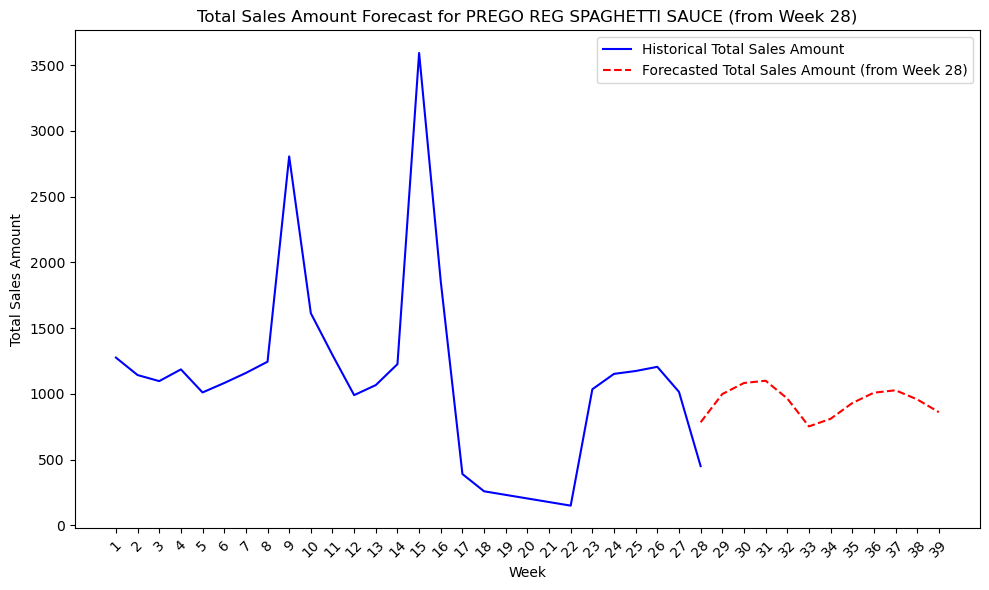

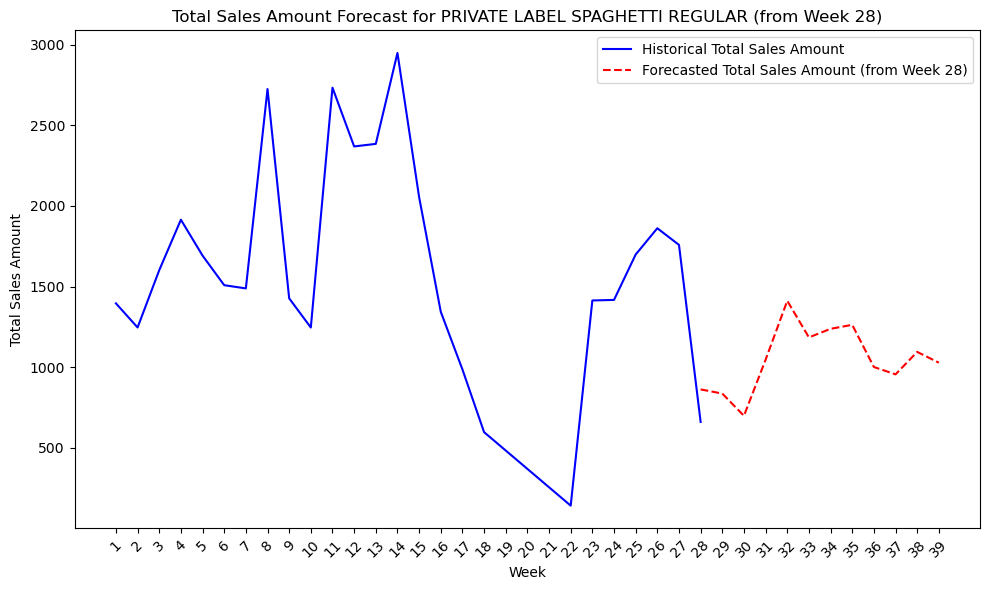

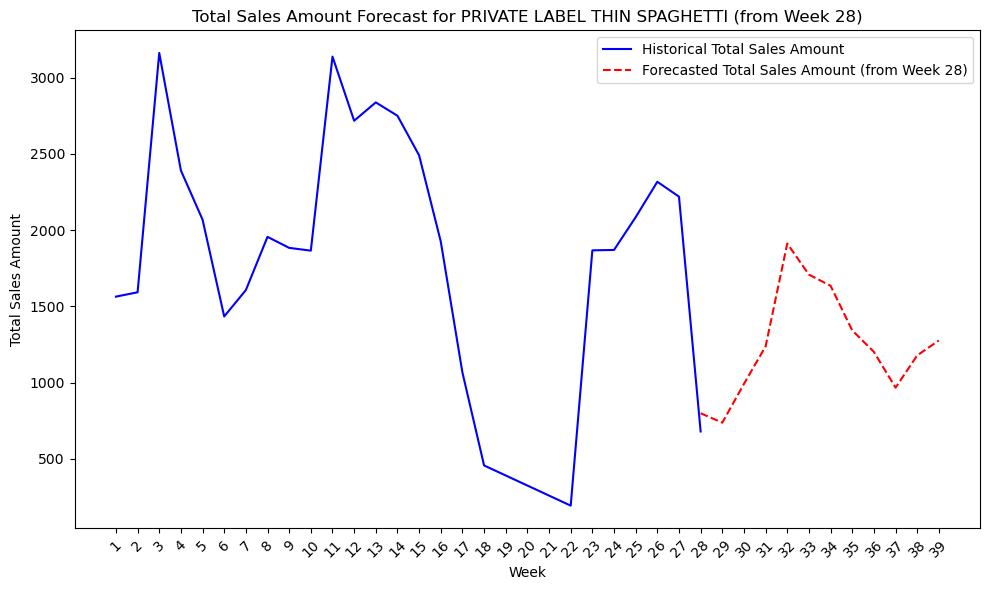

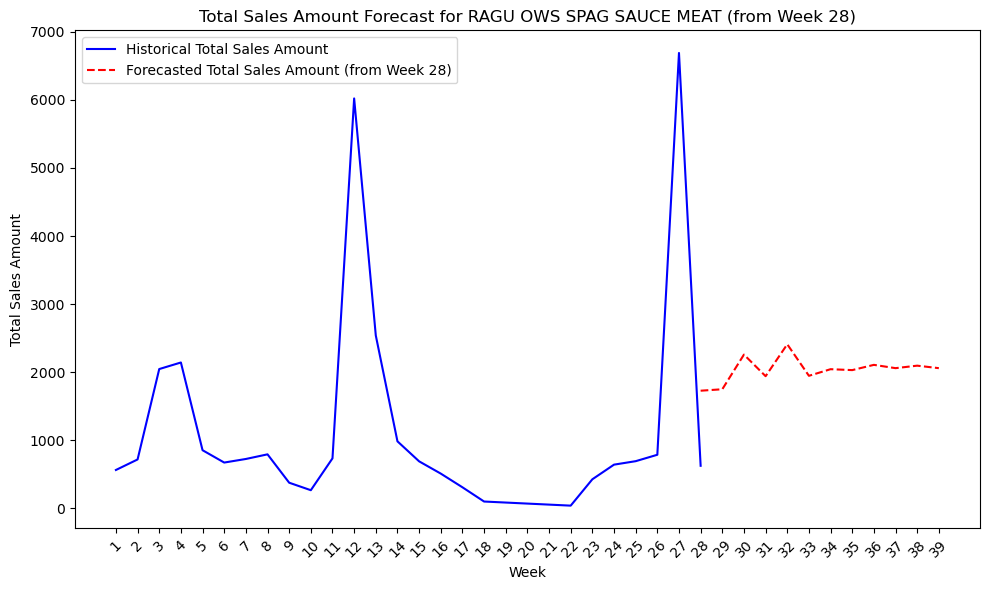

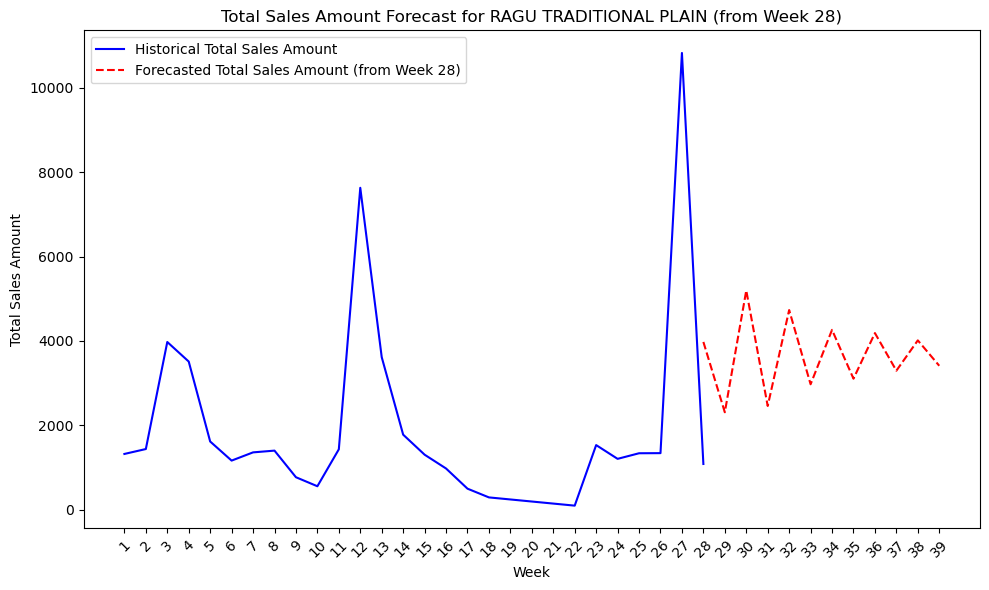

In [81]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Forecast for top 5 products by total sales amount (totAmnt)
print("\nForecasting for Top 5 Products by Total Sales Amount (totAmnt):\n")

for product in time_series_amount_df.columns:
    # Prepare the product's time series data
    product_sales = time_series_amount_df[product]
    
    # Fit ARIMA model
    model = ARIMA(product_sales, order=(5, 1, 0))  # Adjust ARIMA order as necessary
    model_fit = model.fit()
    
    # Forecast next 12 weeks starting from week 28
    forecast = model_fit.forecast(steps=forecast_steps)
    
    # Ensure the forecast starts from week 28 (after historical data)
    forecast_index = range(forecast_start_week, forecast_start_week + forecast_steps)
    
    # Plot forecast for total sales amount (totAmnt)
    plot_forecast(product, product_sales, forecast, forecast_index, 'Total Sales Amount', "Total Sales Amount Forecast")
